## CSS (Assignment 2)
## Name: Usama Mazhar
## Matriculation Number: 219203368

### Task1

In [50]:
#1.1
import requests
from bs4 import BeautifulSoup 

In [51]:
page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")
soup = BeautifulSoup(page.content, 'html.parser') 
out = open("wiki_countries.html","w", encoding="utf-8")
out.write(str(soup))
out.close()

In [52]:
soup = BeautifulSoup(open("wiki_countries.html", encoding="utf-8"), "html.parser")

#Extracting Continents
continents=soup.find_all(class_ ='mw-headline')
continent=[]
for item in continents:
    continent.append(item.get_text())
new_continent=continent[0:7]

#Extracting Countries
countries_african=[]
links_african = soup.find_all("ul")[1].select("li")
for item in links_african:
    iitems=item.find("a").get_text()
    countries_african.append(iitems)

countries_asia=[]
links_asia= soup.find_all("ul")[2].select("li")
for item in links_asia:
    iitems=item.find("a").get_text()
    countries_asia.append(iitems)

countries_europe=[]    
links_europe= soup.find_all("ul")[3].select("li")
for item in links_europe:
    iitems=item.find("a").get_text()
    countries_europe.append(iitems)

countries_north=[]
links_north= soup.find_all("ul")[4].select("li")
for item in links_north:
    iitems=item.find("a").get_text()
    countries_north.append(iitems)

countries_south=[]
links_south= soup.find_all("ul")[5].select("li")
for item in links_south:
    iitems=item.find("a")
    if iitems is not None:
        countries_south.append(iitems.get_text())
    

countries_aus=[]
links_aus= soup.find_all("ul")[6].select("li")
for item in links_aus:
    
    iitems=item.find("a").get_text()
    countries_aus.append(iitems)

countries_re_aus=[]
links_re_aus= soup.find_all("ul")[7].select("a")
for item in links_re_aus:
    countries_re_aus.append(item.get_text())   
coun_aus=countries_aus+countries_re_aus

In [53]:
#assigning countries to specific continent using dictionary
dictionary ={}
dictionary[new_continent[0]]=[]
for item in countries_african:
    dictionary[new_continent[0]].append(item)

dictionary[new_continent[1]]=[]
dictionary[new_continent[1]].append("null")

dictionary[new_continent[2]]=[]
for item in countries_asia:
    dictionary[new_continent[2]].append(item)

dictionary[new_continent[3]]=[]
for item in countries_europe:
    dictionary[new_continent[3]].append(item)

dictionary[new_continent[4]]=[]
for item in countries_north:
    dictionary[new_continent[4]].append(item)

dictionary[new_continent[5]]=[]
for item in countries_south:
    dictionary[new_continent[5]].append(item)

dictionary[new_continent[6]]=[]
for item in coun_aus:
    dictionary[new_continent[6]].append(item)

In [54]:
#1.2
import pandas as pd
df=pd.DataFrame.from_dict(dictionary,orient='index')
df = df.stack().to_frame().reset_index().drop('level_1', axis=1)
df.columns = ['Continents', 'Country or region']
df

,Continents,Country or region
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
228,Oceania/Australia,New Caledonia
229,Oceania/Australia,New Guinea
230,Oceania/Australia,Sulawesi
231,Oceania/Australia,Sumbawa


In [55]:
#1.3 and 1.4
page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_World_Happiness_Report")
soup = BeautifulSoup(page.content, 'html.parser') 
out_file = open("Happiness_report.html","w", encoding="utf-8")
out_file.write(str(soup))
out_file.close()
soup_happ = BeautifulSoup(open("Happiness_report.html", encoding="utf-8"), "html.parser")

In [56]:
heading_table=[]
data_table=[]
dic_data={}
links_table = soup.find("table", class_="wikitable sortable").find_all("th")
data_links = soup.find("table", class_="wikitable sortable").find_all("td")

for item in links_table:
    heading_table.append(item.get_text().strip('\n'))
for item in data_links:
    data_table.append(item.get_text().strip('\n').replace('\xa0', ''))
for data in heading_table:
    dic_data[data]=[]
    if data=="Overall rank":
        for data2 in data_table[::9]:
            dic_data[data].append(data2)
    elif data=="Country or region":
        for data3 in data_table[1::9]:
            dic_data[data].append(data3)
    elif data=="Score":
        for data3 in data_table[2::9]:
            dic_data[data].append(data3)
    elif data=="GDP per capita":
        for data3 in data_table[3::9]:
            dic_data[data].append(data3)
    elif data=="Social support":
        for data3 in data_table[4::9]:
            dic_data[data].append(data3)
    elif data=="Healthy life expectancy":
        for data3 in data_table[5::9]:
            dic_data[data].append(data3)
    elif data=="Freedom to make life choices":
        for data3 in data_table[6::9]:
            dic_data[data].append(data3)
    elif data=="Generosity":
        for data3 in data_table[7::9]:
            dic_data[data].append(data3)
    elif data=="Perceptions of corruption":
        for data3 in data_table[8::9]:
            dic_data[data].append(data3)


In [57]:
df1=pd.DataFrame.from_dict(dic_data,orient='index').transpose()
result_df=df1.to_csv("happiness report", sep='\t', encoding='utf-8',index=False)
df1=pd.merge(df1, df, on='Country or region')
df1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...,...,...
143,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa
144,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Africa
145,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
146,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Africa


### Task 2

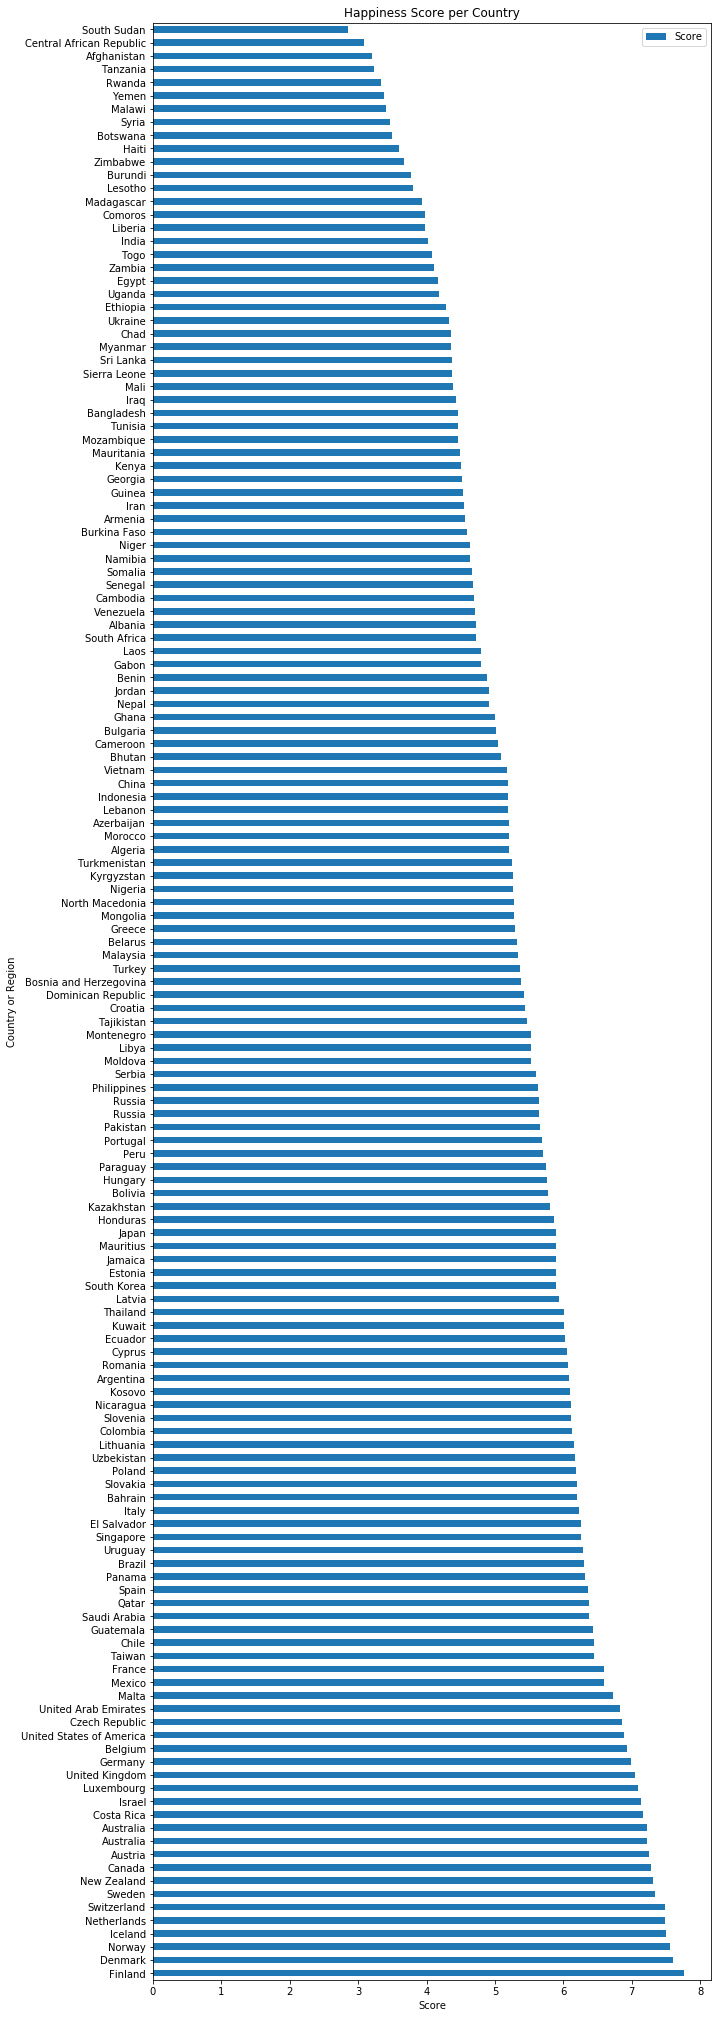

In [58]:
#2.1
import matplotlib.pyplot as plt 
df1['Score'] = df1['Score'].astype(float)
df1.plot.barh(x="Country or region", y="Score", figsize=(10,36))
plt.xlabel('Score')
plt.ylabel('Country or Region')
plt.title('Happiness Score per Country')
plt.show()

In [59]:
#2.2 Top 10 happiest Countries
top_countries=df1['Country or region'].head(10)

#2.3 average of happiness
average=df1['Score'].mean()
print(average)

#2.4 contries below the median
average_median=df1['Score'].median()
df2=df1[df1['Score']<average_median]
countries_below_mean=df2['Country or region']
countries_below_mean

5.435229729729729


74           Dominican Republic
75       Bosnia and Herzegovina
76                       Turkey
77                     Malaysia
78                      Belarus
                 ...           
143                      Rwanda
144                    Tanzania
145                 Afghanistan
146    Central African Republic
147                 South Sudan
Name: Country or region, Length: 74, dtype: object

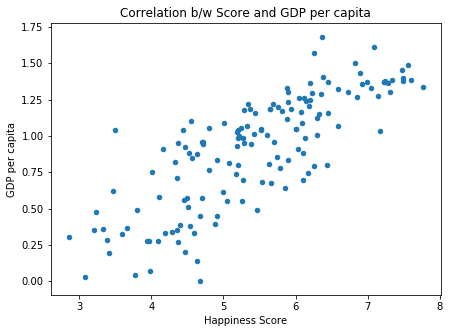

In [60]:
#2.5
df1['GDP per capita'] = df1['GDP per capita'].astype(float)
df1.plot.scatter(x="Score", y="GDP per capita", figsize=(7,5))
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.title('Correlation b/w Score and GDP per capita')
plt.show()

Above correlation b/w Happiness Score and GDP per Capita shows that one variable increases with the other which means they have postive correlation but it is not so strong. So, it means they have moderate positive correlation. Having good GDP of a country leads to good affect on Happiness Score.

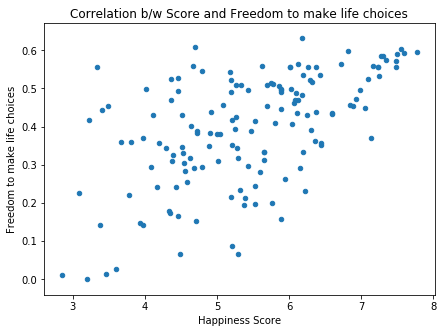

In [61]:
df1['Freedom to make life choices'] = df1['Freedom to make life choices'].astype(float)
df1.plot.scatter(x="Score", y="Freedom to make life choices", figsize=(7,5))
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to make life choices')
plt.title('Correlation b/w Score and Freedom to make life choices')
plt.show()

There is a really really weak postive correlation b/w Score and Freedom which is almost leads to no correlation.

In [62]:
#Happiest countries per continent
happiestcountry_per_continent=df1.loc[df1.groupby('Continents')['Score'].idxmax()].sort_values(by=['Score'],ascending=False)
happiestcountry_per_continent

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania/Australia
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
13,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,Asia
25,26,Chile,6.444,1.159,1.369,0.920,0.357,0.187,0.056,South America
55,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,Africa
